### Objective
##### 1. Explore the employee retention data
##### 2. Report daily headcount for each company
##### 3. Build a model to predict employee chunk 
##### 4. Find the main factors that drive employee churn
##### 5. Add more variable to improve the model prediction

### Data Sources
#####  “employee_retention”: comprehensive information about employees. 
The table is: employee_retention - comprehensive information about employees. 

Columns:

•	employee_id : id of the employee. Unique by employee per company

•	company_id : company id.

•	dept : employee dept

•	seniority : number of yrs of work experience when hired

•	salary: avg yearly salary of the employee during her tenure within the company

•	join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13

•	quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)


## Index
### A. Import library, data and data exploration
### B. Data Manipulate
### C. Exploratory Data Analysis
### D. Daily Headcount
### E. Chunk Prediction
### F. Analysis

### A. Import library, data and data exploration

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.ensemble import ExtraTreesClassifier

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz 
from sklearn.tree import export_graphviz

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import data from csv file
retention= pd.read_csv('employee_retention_data.csv')

In [3]:
pd.set_option('display.expand_frame_repr', False) #show all columns in dataset
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [4]:
#Check 5 top and bottom rows
retention.head()

employee_id  company_id              dept  seniority    salary   join_date   quit_date
0      13021.0           7  customer_service         28   89000.0  2014-03-24  2015-10-30
1     825355.0           7         marketing         20  183000.0  2013-04-29  2014-04-04
2     927315.0           4         marketing         14  101000.0  2014-10-13         NaN
3     662910.0           7  customer_service         20  115000.0  2012-05-14  2013-06-07
4     256971.0           2      data_science         23  276000.0  2011-10-17  2014-08-22

In [5]:
retention.tail()

employee_id  company_id              dept  seniority    salary   join_date   quit_date
24697     549847.0           3  customer_service         16   97000.0  2015-02-18         NaN
24698     590087.0           4          engineer         10  160000.0  2015-10-26         NaN
24699     777612.0           4  customer_service         11   67000.0  2013-09-03  2015-10-23
24700      97289.0          10          engineer         98  266000.0  2011-12-13  2015-01-09
24701     604052.0           1         marketing         99  185000.0  2011-07-26  2013-12-06

In [6]:
#Check data infomation
retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [7]:
#check number of Null value
retention.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [8]:
retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [9]:
retention.head()

employee_id  company_id              dept  seniority    salary   join_date   quit_date
0      13021.0           7  customer_service         28   89000.0  2014-03-24  2015-10-30
1     825355.0           7         marketing         20  183000.0  2013-04-29  2014-04-04
2     927315.0           4         marketing         14  101000.0  2014-10-13         NaN
3     662910.0           7  customer_service         20  115000.0  2012-05-14  2013-06-07
4     256971.0           2      data_science         23  276000.0  2011-10-17  2014-08-22

### B.  Data Manipulate

#### 1. Convert date to datetime format

In [10]:
retention['join_date'] = pd.to_datetime(retention['join_date'], format="%Y/%m/%d")
retention['quit_date'] = pd.to_datetime(retention['quit_date'], format="%Y/%m/%d")

#### 2. Create a dummy variable to indicate whether an employee still in the company by 2015/12/13 - 0=chunk, 1= Non-chunk

In [11]:
retention['still_employee'] = retention['quit_date'].isnull().astype(int)

In [12]:
retention.head()

employee_id  company_id              dept  seniority    salary  join_date  quit_date  still_employee
0      13021.0           7  customer_service         28   89000.0 2014-03-24 2015-10-30               0
1     825355.0           7         marketing         20  183000.0 2013-04-29 2014-04-04               0
2     927315.0           4         marketing         14  101000.0 2014-10-13        NaT               1
3     662910.0           7  customer_service         20  115000.0 2012-05-14 2013-06-07               0
4     256971.0           2      data_science         23  276000.0 2011-10-17 2014-08-22               0

#### 3. Calculate tenure for each employee

In [13]:
#create variable "end_date" as a virtual quit date which can capture a virtual quit day(2015/12/13) of employee who still in the company
retention['end_date']= retention['quit_date']
retention['end_date'].fillna('2015-12-13',inplace=True)
retention['end_date'] = pd.to_datetime(retention['end_date'], format="%Y/%m/%d")
#Create a new varible named "tenure" which represent number of day working
retention['tenure'] = retention['end_date'] - retention['join_date']
retention['tenure']=retention['tenure'].dt.days

In [14]:
retention.head()

employee_id  company_id              dept  seniority    salary  join_date  quit_date  still_employee   end_date  tenure
0      13021.0           7  customer_service         28   89000.0 2014-03-24 2015-10-30               0 2015-10-30     585
1     825355.0           7         marketing         20  183000.0 2013-04-29 2014-04-04               0 2014-04-04     340
2     927315.0           4         marketing         14  101000.0 2014-10-13        NaT               1 2015-12-13     426
3     662910.0           7  customer_service         20  115000.0 2012-05-14 2013-06-07               0 2013-06-07     389
4     256971.0           2      data_science         23  276000.0 2011-10-17 2014-08-22               0 2014-08-22    1040

### C. Exploratory Data Analysis

#### 1. Company

1     8486
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     865
12      24
11      16
Name: company_id, dtype: int64


Text(0.5,0,'Company ID')

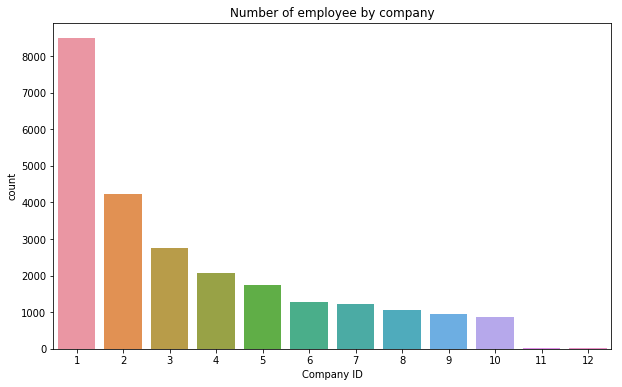

In [15]:
%matplotlib inline
print(retention['company_id'].value_counts())
plt.gcf().set_size_inches(10,6)
sns.countplot(x='company_id',data=retention)
plt.title('Number of employee by company')
plt.xlabel('Company ID')

In [16]:
retention[['company_id','seniority','salary','still_employee','tenure']].groupby('company_id').mean()

seniority         salary  still_employee      tenure
company_id                                                      
1           14.141999  152167.570115        0.455456  578.114306
2           14.297489  155728.090952        0.477499  584.572241
3           14.054565  122118.588578        0.443070  564.431430
4           14.023763  122721.144520        0.440834  563.377789
5           14.474644  123348.717949        0.439886  570.156125
6           14.089853  119925.639040        0.448490  567.033308
7           13.906046  121582.516340        0.434641  582.803922
8           13.867240  122284.622732        0.446991  563.765043
9           13.778356  123905.306972        0.449532  569.098855
10          14.089017  121553.757225        0.445087  570.295954
11          14.375000  109562.500000        0.250000  615.937500
12          11.166667   73000.000000        0.500000  551.583333

##### Comment:
- There are 12 companies. 
- Company 1 has the largest number of employees, followed by Company 2 and 3. In constrast, Company 11 and 12 have less than 25 employees each.
- Average seniority in Company 12 is the lowest at 11.17 years and in Company 5 is the highest at 14.47 years.
- Similarly, Average salary in Company 12 is only 73000/ year but in Company 2 is more than 155k annually. 
- In term of tenure, Company 11 has the most loyalty employee with 615 days in average however in Company 12, 551 days is the average tenure. 

#### 2. Department

customer_service    9180
engineer            4613
data_science        3190
sales               3172
marketing           3167
design              1380
Name: dept, dtype: int64


Text(0.5,0,'Company ID')

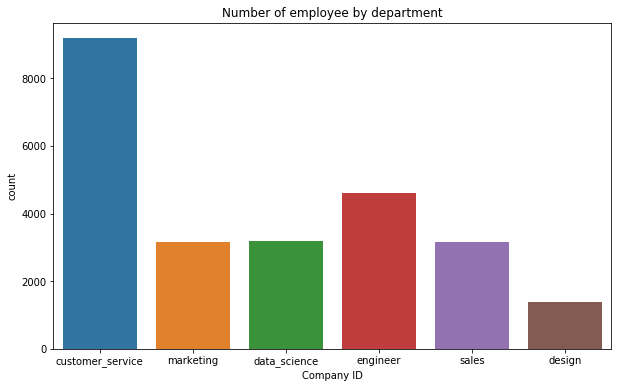

In [17]:
%matplotlib inline
print(retention['dept'].value_counts())
plt.gcf().set_size_inches(10,6)
sns.countplot(x='dept',data=retention)
plt.title('Number of employee by department')
plt.xlabel('Company ID')

In [18]:
%matplotlib inline
table=pd.crosstab(retention['company_id'],retention['dept'])
print(table)

dept        customer_service  data_science  design  engineer  marketing  sales
company_id                                                                    
1                       3157          1079     499      1568       1085   1098
2                       1548           568     223       829        541    513
3                       1010           347     141       516        372    363
4                        777           279     107       376        269    254
5                        635           216     108       315        226    255
6                        503           153      77       221        175    162
7                        469           153      70       227        141    164
8                        385           146      53       191        135    137
9                        342           134      60       188        124    113
10                       336           109      41       172         96    111
11                         6             2       0  

##### Comment:
- There are 6 departments
- Customer Service has the largest number of employees and second is engineer.
- Design has 1380 employees and is the lowest number among group of 6.

#### 3. Seniority

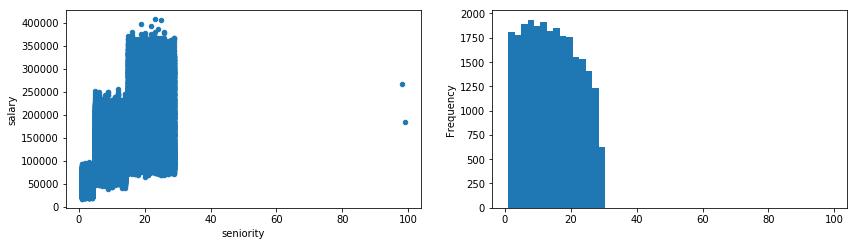

In [19]:
plt.gcf().set_size_inches(14,8)
retention.plot(kind='scatter',x='seniority',y='salary',ax=plt.subplot(221))
retention.seniority.plot(kind="hist", bins=50, ax=plt.subplot(222))

In [20]:
retention.sort_values(by='seniority',ascending=False).head(5)

employee_id  company_id              dept  seniority    salary  join_date  quit_date  still_employee   end_date  tenure
24701     604052.0           1         marketing         99  185000.0 2011-07-26 2013-12-06               0 2013-12-06     864
24700      97289.0          10          engineer         98  266000.0 2011-12-13 2015-01-09               0 2015-01-09    1123
11717     426218.0           2  customer_service         29  118000.0 2011-03-02 2013-07-12               0 2013-07-12     863
12013     889253.0           2          engineer         29  318000.0 2011-09-12        NaT               1 2015-12-13    1553
647       664204.0           8         marketing         29  147000.0 2014-02-03 2015-02-20               0 2015-02-20     382

##### Comment:
- There are 2 outliers in seniority which have unreal seniority of 99 and 98 years. This 2 outliers will affect the prediction so we will remove them from our data.

In [21]:
retention=retention.drop([24701, 24700])

In [22]:
print ("Average seniority: ","%8.3f"%  retention.seniority.mean())
print ("Median seniority: ","%8.3f"%  retention.seniority.median())

Average seniority:    14.121
Median seniority:    14.000


In [23]:
print(retention[['still_employee','seniority']].groupby('still_employee').mean().sort_values(by="seniority"))

                seniority
still_employee           
0               14.118967
1               14.123392


##### Comment:
- Average seniority is 14.121 and median is 14
- Seniorities for chunk and non-chunk employee are similar at 14.11 and 14.12

#### 4. Salary

In [24]:
print ("Average salary: ", "%8.3f"% retention.salary.mean())

Average salary:  138176.275


                         salary
dept                           
customer_service   82245.424837
marketing         135582.438408
sales             135912.358134
design            137460.869565
engineer          205531.439722
data_science      206885.893417


Text(0,0.5,'Department')

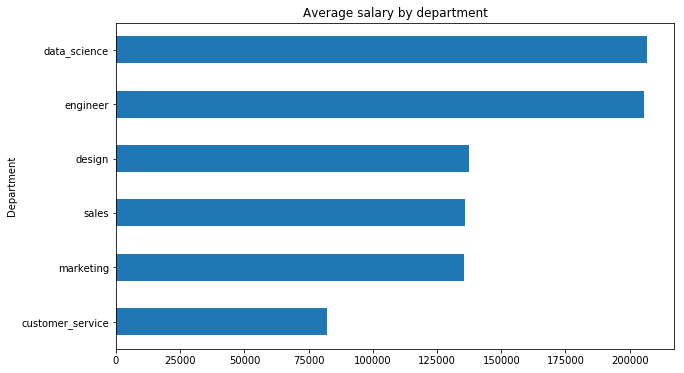

In [25]:
print(retention[['dept','salary']].groupby('dept').mean().sort_values(by="salary"))
retention[['dept','salary']].groupby('dept').mean().sort_values(by="salary").plot(kind="barh",legend=None)
plt.gcf().set_size_inches(10,6)
plt.title('Average salary by department')
plt.ylabel('Department')

In [26]:
print(retention[['still_employee','salary']].groupby('still_employee').mean().sort_values(by="salary"))

                       salary
still_employee               
0               135639.102754
1               141238.473910


##### Comment:
- Average salary is $138,176.275.
- Data Science is the highest paid job and in the contrast, customer service role is lowest paid job.
- In average, employees who still stay with the company after 2015/12/13 have higher salary than those who are leaved.

#### 5. Chunk status

In [27]:
print ("Chunk percentage: ","%8.3f"%  ((1 - retention.still_employee.mean())*100),"%")

Chunk percentage:    54.688 %


Text(0,0.5,'Proportion of chunk')

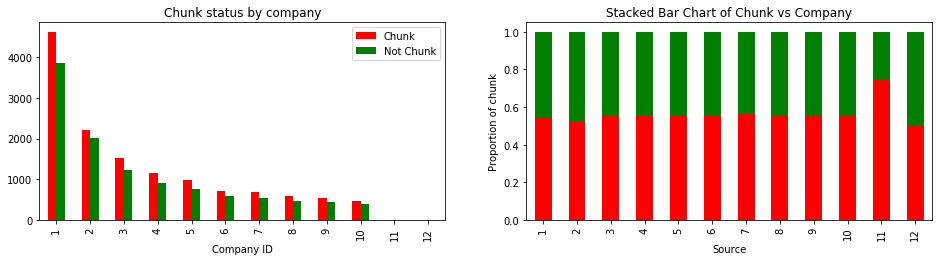

In [28]:
%matplotlib inline
plt.gcf().set_size_inches(16,8)
table=pd.crosstab(retention.company_id,retention.still_employee)
table.plot(kind='bar',ax=plt.subplot(221),color=["r","g"])
plt.title('Chunk status by company')
plt.xlabel('Company ID')
plt.legend(labels=['Chunk','Not Chunk'], loc=1, fontsize=10) #show graph's legend
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',legend=None, stacked=True, ax=plt.subplot(222),color=["r","g"])
plt.title('Stacked Bar Chart of Chunk vs Company')
plt.xlabel('Source')
plt.ylabel('Proportion of chunk')

Text(0,0.5,'Proportion of chunk')

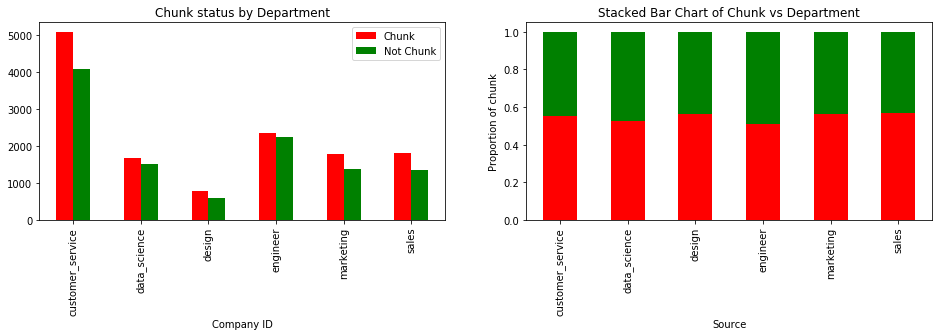

In [29]:
%matplotlib inline
plt.gcf().set_size_inches(16,8)
table=pd.crosstab(retention.dept,retention.still_employee)
table.plot(kind='bar',ax=plt.subplot(221),color=["r","g"])
plt.title('Chunk status by Department')
plt.xlabel('Company ID')
plt.legend(labels=['Chunk','Not Chunk'], loc=1, fontsize=10) #show graph's legend
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',legend=None, stacked=True, ax=plt.subplot(222),color=["r","g"])
plt.title('Stacked Bar Chart of Chunk vs Department')
plt.xlabel('Source')
plt.ylabel('Proportion of chunk')

##### Comment:
- Chunk rate in Company 12 is lowest with only 50% due to their low number of employees but its peer, company 11 has the largest rate at 75%. Other companies have the chunk rate in range from 52% to 57%
- Design role have the highest chunk rate and on the other hands, data science and engineer have low rate of chunk.

#### 6.Tenure

Text(0.5,0,'Tenure')

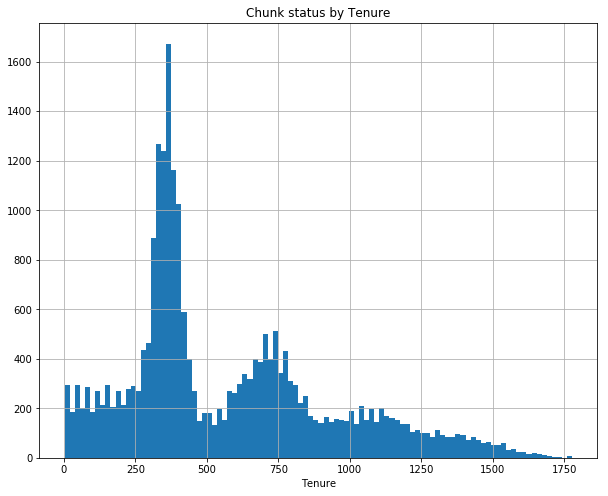

In [30]:
plt.gcf().set_size_inches(10,8)
retention.tenure.hist(bins=100)
plt.title('Chunk status by Tenure')
plt.xlabel('Tenure')

Text(0.5,0,'Tenure')

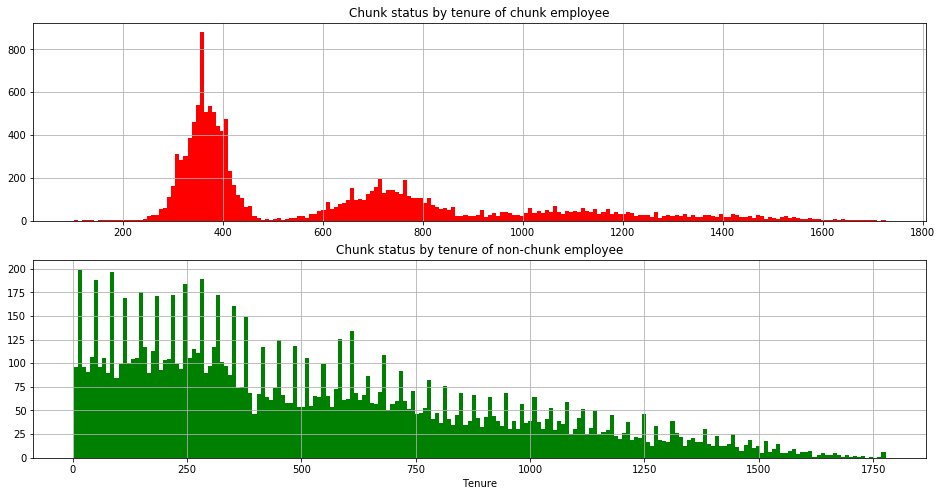

In [31]:
plt.gcf().set_size_inches(12,10)
#table=pd.crosstab(retention.tenure,retention.still_employee)
plt.gcf().set_size_inches(16,8)
retention.tenure[retention.still_employee==0].hist(bins=200,ax=plt.subplot(211),color="r")
plt.title('Chunk status by tenure of chunk employee')
table=pd.crosstab(retention.tenure,retention.still_employee==1)
retention.tenure[retention.still_employee==1].hist(bins=200,ax=plt.subplot(212),color="g")
plt.title('Chunk status by tenure of non-chunk employee')
plt.xlabel('Tenure')

##### Comment:
- Distribution of tenure for chunk employee and non-chunk employee are different in shape. 
- Distribution of tenure for chunk employee is followed some pattern: the highest peak is around a year and decrease after that and rise again in the time around 2 years. 
- For non-chunk employees, the rate decreased by time but there are some regular peaks point where have more employees than other period. Those peak points represent each month. 

### D. Daily Headcount

In [32]:
print('Number of new employee each day')
pd.pivot_table(retention, index=["company_id"],columns=["join_date"], values="employee_id",aggfunc="count",fill_value=0,margins=True)

Number of new employee each day


join_date   2011-01-24 00:00:00  2011-01-25 00:00:00  2011-01-26 00:00:00  2011-01-31 00:00:00  2011-02-01 00:00:00  2011-02-02 00:00:00  2011-02-03 00:00:00  2011-02-07 00:00:00  2011-02-08 00:00:00  2011-02-09 00:00:00  2011-02-10 00:00:00  2011-02-14 00:00:00  2011-02-15 00:00:00  2011-02-16 00:00:00  2011-02-22 00:00:00  2011-02-23 00:00:00  2011-02-24 00:00:00  2011-02-28 00:00:00  2011-03-01 00:00:00  2011-03-02 00:00:00  2011-03-03 00:00:00  2011-03-07 00:00:00  2011-03-08 00:00:00  2011-03-09 00:00:00  2011-03-10 00:00:00  2011-03-14 00:00:00  2011-03-15 00:00:00  2011-03-16 00:00:00  2011-03-17 00:00:00  2011-03-21 00:00:00  2011-03-22 00:00:00  2011-03-23 00:00:00  2011-03-24 00:00:00  2011-03-28 00:00:00  2011-03-29 00:00:00  2011-03-30 00:00:00  2011-04-01 00:00:00  2011-04-04 00:00:00  2011-04-05 00:00:00  2011-04-06 00:00:00  2011-04-07 00:00:00  2011-04-11 00:00:00  2011-04-12 00:00:00  2011-04-13 00:00:00  2011-04-14 00:00:00  2011-04-18 00:00:00  2011-04-19 00:00:00  2011-04-20 00:00:00  2011-04-21 00:00:00  2011-04-25 00:00:00  2011-04-26 00:00:00  2011-04-27 00:00:00  2011-04-28 00:00:00  2011-05-02 00:00:00  2011-05-03 00:00:00  2011-05-04 00:00:00  2011-05-05 00:00:00  2011-05-09 00:00:00  2011-05-10 00:00:00  2011-05-11 00:00:00  2011-05-12 00:00:00  2011-05-16 00:00:00  2011-05-17 00:00:00  2011-05-18 00:00:00  2011-05-19 00:00:00  2011-05-23 00:00:00  2011-05-24 00:00:00  2011-05-25 00:00:00  2011-05-26 00:00:00  2011-05-31 00:00:00  2011-06-01 00:00:00  2011-06-02 00:00:00  2011-06-06 00:00:00  2011-06-07 00:00:00  2011-06-08 00:00:00  2011-06-09 00:00:00  2011-06-13 00:00:00  2011-06-14 00:00:00  2011-06-15 00:00:00  2011-06-16 00:00:00  2011-06-20 00:00:00  2011-06-21 00:00:00  2011-06-22 00:00:00  2011-06-23 00:00:00  2011-06-27 00:00:00  2011-06-28 00:00:00  2011-06-29 00:00:00  2011-06-30 00:00:00  2011-07-05 00:00:00  2011-07-06 00:00:00  2011-07-07 00:00:00  2011-07-11 00:00:00  2011-07-12 00:00:00  2011-07-13 00:00:00  2011-07-14 00:00:00  2011-07-15 00:00:00  2011-07-18 00:00:00  2011-07-19 00:00:00  2011-07-20 00:00:00  2011-07-21 00:00:00  ...    2015-06-17 00:00:00  2015-06-18 00:00:00  2015-06-22 00:00:00  2015-06-23 00:00:00  2015-06-24 00:00:00  2015-06-29 00:00:00  2015-06-30 00:00:00  2015-07-01 00:00:00  2015-07-02 00:00:00  2015-07-06 00:00:00  2015-07-07 00:00:00  2015-07-08 00:00:00  2015-07-09 00:00:00  2015-07-13 00:00:00  2015-07-14 00:00:00  2015-07-15 00:00:00  2015-07-16 00:00:00  2015-07-20 00:00:00  2015-07-21 00:00:00  2015-07-22 00:00:00  2015-07-23 00:00:00  2015-07-27 00:00:00  2015-07-28 00:00:00  2015-07-29 00:00:00  2015-07-30 00:00:00  2015-08-03 00:00:00  2015-08-04 00:00:00  2015-08-05 00:00:00  2015-08-06 00:00:00  2015-08-10 00:00:00  2015-08-11 00:00:00  2015-08-12 00:00:00  2015-08-13 00:00:00  2015-08-17 00:00:00  2015-08-18 00:00:00  2015-08-19 00:00:00  2015-08-20 00:00:00  2015-08-24 00:00:00  2015-08-25 00:00:00  2015-08-26 00:00:00  2015-08-27 00:00:00  2015-08-31 00:00:00  2015-09-01 00:00:00  2015-09-02 00:00:00  2015-09-03 00:00:00  2015-09-08 00:00:00  2015-09-09 00:00:00  2015-09-10 00:00:00  2015-09-14 00:00:00  2015-09-15 00:00:00  2015-09-16 00:00:00  2015-09-17 00:00:00  2015-09-21 00:00:00  2015-09-22 00:00:00  2015-09-23 00:00:00  2015-09-24 00:00:00  2015-09-28 00:00:00  2015-09-29 00:00:00  2015-09-30 00:00:00  2015-10-01 00:00:00  2015-10-05 00:00:00  2015-10-06 00:00:00  2015-10-07 00:00:00  2015-10-08 00:00:00  2015-10-12 00:00:00  2015-10-13 00:00:00  2015-10-14 00:00:00  2015-10-15 00:00:00  2015-10-19 00:00:00  2015-10-20 00:00:00  2015-10-21 00:00:00  2015-10-22 00:00:00  2015-10-26 00:00:00  2015-10-27 00:00:00  2015-10-28 00:00:00  2015-10-29 00:00:00  2015-11-02 00:00:00  2015-11-03 00:00:00  2015-11-04 00:00:00  2015-11-05 00:00:00  2015-11-09 00:00:00  2015-11-10 00:00:00  2015-11-11 00:00:00  2015-11-12 00:00:00  2015-11-16 00:00:00  2015-11-17 00:00:00  2015-11-18 00:00:00  2015-11-19 00:00:00  2015-11-23 00:00:00  2015-11-24 0

In [33]:
print('Number of chunk employee each day')
pd.pivot_table(retention, index=["company_id"],columns=["quit_date"], values="employee_id",aggfunc="count",fill_value=0,margins=True)

Number of chunk employee each day


quit_date   2011-10-13 00:00:00  2011-10-14 00:00:00  2011-10-21 00:00:00  2011-10-28 00:00:00  2011-11-11 00:00:00  2011-11-22 00:00:00  2011-11-25 00:00:00  2011-12-02 00:00:00  2011-12-09 00:00:00  2011-12-13 00:00:00  2011-12-16 00:00:00  2011-12-23 00:00:00  2011-12-30 00:00:00  2012-01-03 00:00:00  2012-01-05 00:00:00  2012-01-06 00:00:00  2012-01-09 00:00:00  2012-01-13 00:00:00  2012-01-17 00:00:00  2012-01-18 00:00:00  2012-01-19 00:00:00  2012-01-20 00:00:00  2012-01-24 00:00:00  2012-01-27 00:00:00  2012-01-30 00:00:00  2012-02-02 00:00:00  2012-02-03 00:00:00  2012-02-07 00:00:00  2012-02-10 00:00:00  2012-02-15 00:00:00  2012-02-17 00:00:00  2012-02-22 00:00:00  2012-02-24 00:00:00  2012-02-29 00:00:00  2012-03-02 00:00:00  2012-03-06 00:00:00  2012-03-07 00:00:00  2012-03-08 00:00:00  2012-03-09 00:00:00  2012-03-15 00:00:00  2012-03-16 00:00:00  2012-03-20 00:00:00  2012-03-22 00:00:00  2012-03-23 00:00:00  2012-03-27 00:00:00  2012-03-30 00:00:00  2012-04-03 00:00:00  2012-04-04 00:00:00  2012-04-09 00:00:00  2012-04-10 00:00:00  2012-04-13 00:00:00  2012-04-17 00:00:00  2012-04-19 00:00:00  2012-04-20 00:00:00  2012-04-26 00:00:00  2012-04-27 00:00:00  2012-05-01 00:00:00  2012-05-02 00:00:00  2012-05-03 00:00:00  2012-05-04 00:00:00  2012-05-08 00:00:00  2012-05-09 00:00:00  2012-05-11 00:00:00  2012-05-16 00:00:00  2012-05-18 00:00:00  2012-05-23 00:00:00  2012-05-24 00:00:00  2012-05-25 00:00:00  2012-05-30 00:00:00  2012-05-31 00:00:00  2012-06-01 00:00:00  2012-06-06 00:00:00  2012-06-07 00:00:00  2012-06-08 00:00:00  2012-06-12 00:00:00  2012-06-13 00:00:00  2012-06-14 00:00:00  2012-06-15 00:00:00  2012-06-22 00:00:00  2012-06-25 00:00:00  2012-06-28 00:00:00  2012-06-29 00:00:00  2012-07-03 00:00:00  2012-07-05 00:00:00  2012-07-06 00:00:00  2012-07-11 00:00:00  2012-07-13 00:00:00  2012-07-19 00:00:00  2012-07-20 00:00:00  2012-07-24 00:00:00  2012-07-25 00:00:00  2012-07-27 00:00:00  2012-07-30 00:00:00  2012-07-31 00:00:00  2012-08-03 00:00:00  2012-08-07 00:00:00  2012-08-09 00:00:00  2012-08-10 00:00:00  2012-08-16 00:00:00  2012-08-17 00:00:00  ...    2015-05-29 00:00:00  2015-06-01 00:00:00  2015-06-02 00:00:00  2015-06-03 00:00:00  2015-06-04 00:00:00  2015-06-05 00:00:00  2015-06-10 00:00:00  2015-06-11 00:00:00  2015-06-12 00:00:00  2015-06-16 00:00:00  2015-06-17 00:00:00  2015-06-19 00:00:00  2015-06-22 00:00:00  2015-06-23 00:00:00  2015-06-25 00:00:00  2015-06-26 00:00:00  2015-06-30 00:00:00  2015-07-02 00:00:00  2015-07-06 00:00:00  2015-07-07 00:00:00  2015-07-08 00:00:00  2015-07-09 00:00:00  2015-07-10 00:00:00  2015-07-14 00:00:00  2015-07-15 00:00:00  2015-07-16 00:00:00  2015-07-17 00:00:00  2015-07-21 00:00:00  2015-07-23 00:00:00  2015-07-24 00:00:00  2015-07-27 00:00:00  2015-07-28 00:00:00  2015-07-29 00:00:00  2015-07-30 00:00:00  2015-07-31 00:00:00  2015-08-04 00:00:00  2015-08-05 00:00:00  2015-08-07 00:00:00  2015-08-11 00:00:00  2015-08-12 00:00:00  2015-08-13 00:00:00  2015-08-14 00:00:00  2015-08-19 00:00:00  2015-08-20 00:00:00  2015-08-21 00:00:00  2015-08-25 00:00:00  2015-08-26 00:00:00  2015-08-27 00:00:00  2015-08-28 00:00:00  2015-09-03 00:00:00  2015-09-04 00:00:00  2015-09-08 00:00:00  2015-09-10 00:00:00  2015-09-11 00:00:00  2015-09-14 00:00:00  2015-09-16 00:00:00  2015-09-17 00:00:00  2015-09-18 00:00:00  2015-09-23 00:00:00  2015-09-24 00:00:00  2015-09-25 00:00:00  2015-10-01 00:00:00  2015-10-02 00:00:00  2015-10-05 00:00:00  2015-10-06 00:00:00  2015-10-08 00:00:00  2015-10-09 00:00:00  2015-10-12 00:00:00  2015-10-13 00:00:00  2015-10-14 00:00:00  2015-10-15 00:00:00  2015-10-16 00:00:00  2015-10-19 00:00:00  2015-10-22 00:00:00  2015-10-23 00:00:00  2015-10-28 00:00:00  2015-10-29 00:00:00  2015-10-30 00:00:00  2015-11-02 00:00:00  2015-11-03 00:00:00  2015-11-04 00:00:00  2015-11-05 00:00:00  2015-11-06 00:00:00  2015-11-10 00:00:00  2015-11-11 00:00:00  2015-11-12 00:00:00  2015-11-13 00:00:00  2015-11-17 00:00:00  2015-11-18 00:00:00  2015-11-19 0

In [34]:
headcount = pd.DataFrame(columns=['day','company_id','employee_headcount'])
for day in pd.date_range(start='2011/01/24',end='2015/12/14'):
    temp = pd.DataFrame(retention[(retention['join_date']<=day)&(day<=retention['end_date'])].groupby('company_id')['employee_id'].count())
    temp['day']=day
    temp.rename(columns={'employee_id':'employee_headcount'},inplace=True)
    temp.reset_index(inplace=True)
    headcount = headcount.append(temp)
headcount.head(15)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


company_id        day employee_headcount
0          1 2011-01-24                 25
1          2 2011-01-24                 17
2          3 2011-01-24                  9
3          4 2011-01-24                 12
4          5 2011-01-24                  5
5          6 2011-01-24                  3
6          7 2011-01-24                  1
7          8 2011-01-24                  6
8          9 2011-01-24                  3
0          1 2011-01-25                 27
1          2 2011-01-25                 19
2          3 2011-01-25                 10
3          4 2011-01-25                 12
4          5 2011-01-25                  5
5          6 2011-01-25                  3

In [35]:
headcount['company_id']=headcount['company_id'].astype(str).astype(int)
headcount['employee_headcount']=headcount['employee_headcount'].astype(str).astype(int)

### E. Chunk Prediction
#### 1. Select numeric variable and encode categorical variables

In [36]:
retention.columns

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date', 'quit_date', 'still_employee', 'end_date', 'tenure'], dtype='object')

In [37]:
#Dept Code 'customer_service'=0, 'data_science'=1, 'design'=2, 'engineer'=3, 'marketing'=4, 'sales'=5
le = preprocessing.LabelEncoder()
le.fit(retention.dept)
print (list(le.classes_))
retention['dept_code']=le.transform(retention.dept)

['customer_service', 'data_science', 'design', 'engineer', 'marketing', 'sales']


In [38]:
retention.head()

employee_id  company_id              dept  seniority    salary  join_date  quit_date  still_employee   end_date  tenure  dept_code
0      13021.0           7  customer_service         28   89000.0 2014-03-24 2015-10-30               0 2015-10-30     585          0
1     825355.0           7         marketing         20  183000.0 2013-04-29 2014-04-04               0 2014-04-04     340          4
2     927315.0           4         marketing         14  101000.0 2014-10-13        NaT               1 2015-12-13     426          4
3     662910.0           7  customer_service         20  115000.0 2012-05-14 2013-06-07               0 2013-06-07     389          0
4     256971.0           2      data_science         23  276000.0 2011-10-17 2014-08-22               0 2014-08-22    1040          1

In [39]:
Y=retention['still_employee'] #Y: Target
X=retention.drop(['employee_id','dept','join_date','quit_date','end_date','still_employee'], axis=1) #X: Predictor

##### Comment
- We will only use the variables with numeric values in our models so I only select those variables.
- We encode Department variables

#### 2. Pearson Correlation

            company_id  seniority    salary    tenure  dept_code
company_id    1.000000  -0.010714 -0.164068 -0.010109  -0.004628
seniority    -0.010714   1.000000  0.561011 -0.000236  -0.008920
salary       -0.164068   0.561011  1.000000  0.053798   0.308779
tenure       -0.010109  -0.000236  0.053798  1.000000  -0.002164
dept_code    -0.004628  -0.008920  0.308779 -0.002164   1.000000


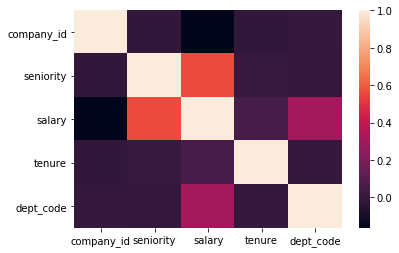

In [40]:
%matplotlib inline
# calculate the correlation matrix
corr = X.corr()
print(corr)
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

##### Comment
- There is no high correlated between features. Seniority and Salary have average correlation at 0.56 but it's still in the range so we can use all the variables.

#### 3. Feature selection:

In [41]:
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X,Y)
print(("Num Features: %d") % fit.n_features_)

print("Selected Features:")
print(pd.DataFrame(list(zip(X.columns.tolist(), fit.support_)),columns=["Var","Selection"]).set_index("Var").iloc[:,0:2])
print("Feature Ranking:")
print(pd.DataFrame(list(zip(X.columns.tolist(), fit.ranking_)),columns=["Var","Rank"]).set_index("Var").iloc[:,0:2])

Num Features: 5
Selected Features:
            Selection
Var                  
company_id       True
seniority        True
salary           True
tenure           True
dept_code        True
Feature Ranking:
            Rank
Var             
company_id     1
seniority      1
salary         1
tenure         1
dept_code      1


##### Comment
- We base on the Logistic regression to choose the feature by include each variable in the model and test the significance of the model. 
- All 5 variables are selected in this case and all rank the same.

#### 3. Importance Ranking

            Importance
Var                   
tenure        0.550751
salary        0.215922
seniority     0.123871
company_id    0.085410
dept_code     0.024046


Text(0.5,0,'Importance')

<Figure size 576x432 with 0 Axes>

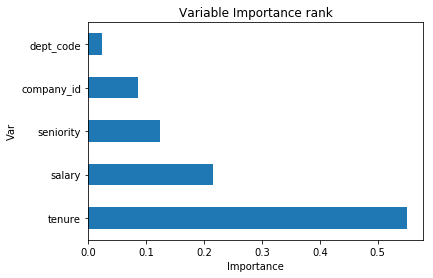

In [42]:
%matplotlib inline
plt.gcf().set_size_inches(8,6)
model = ExtraTreesClassifier()
model.fit(X,Y)
importance= pd.DataFrame(list(zip(X.columns,model.feature_importances_)),columns=["Var","Importance"])
importance=importance.sort_values(by="Importance",ascending=False).set_index("Var")
print(importance)
importance.plot(kind='barh',legend= None)
plt.title('Variable Importance rank')
plt.xlabel('Importance')

##### Comment
- Tenure is the most important feature.
- Second is Salary and third is Seniority. 
- Less important variable is dept_code.

##### => we can exclude dept_code from the model

In [43]:
X=X.drop(['dept_code'], axis=1)

#### 4. PCA

Explained Variance: [0.39754387 0.25154794 0.2469019  0.10400629]


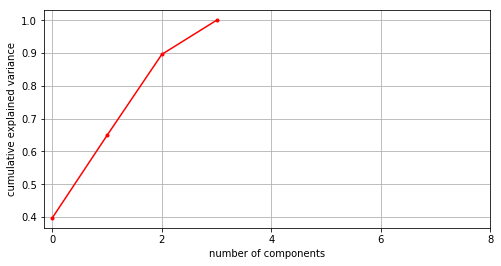

In [44]:
%matplotlib inline
X_std = StandardScaler().fit_transform(X) #Standardize all values
pca = PCA(n_components=4)
fit = pca.fit(X_std)
# summarize components
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
plt.plot(np.cumsum(fit.explained_variance_ratio_), c='red',marker = ".")
plt.xticks(np.arange(0, 10,2))
plt.gcf().set_size_inches(8,4)
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [45]:
pca = decomposition.PCA(n_components=3)
pca.fit(X_std)
X_reduced=pca.fit_transform(X_std)
print (sum(pca.explained_variance_ratio_))

# load new loadings of 4 PC
X_reduceddf= pd.DataFrame(X_reduced,columns=["PC1","PC2","PC3"])
X_reduceddf.head(10)

0.8959937070694484


PC1       PC2       PC3
0  0.430470 -1.109231  1.346938
1  0.586634 -1.429829  0.787066
2 -0.426985 -0.435012 -0.085166
3 -0.034660 -1.310082  0.857380
4  2.218673  1.034934  0.561268
5  0.194799 -0.109959  0.174311
6  0.281234  0.145757  0.652437
7 -1.725540  0.772261 -0.526911
8 -0.737595  0.111730  2.249240
9 -0.592844  2.269782  0.294732

##### Comment
- In PCA, we need to standardize the data 
- The variances for 3 first PCs are around 89%. This level can be enough to explain the data so we can use new PCA loadings in the model.
- We save the new loading in X_reduceddf for future use. 
- In this case, we can use PCA loadings or original loadings to run the model. But with the PCA loading, the outcome will hard to interpret and the number of variables in this project is not large so keeping original loading is more sense. 

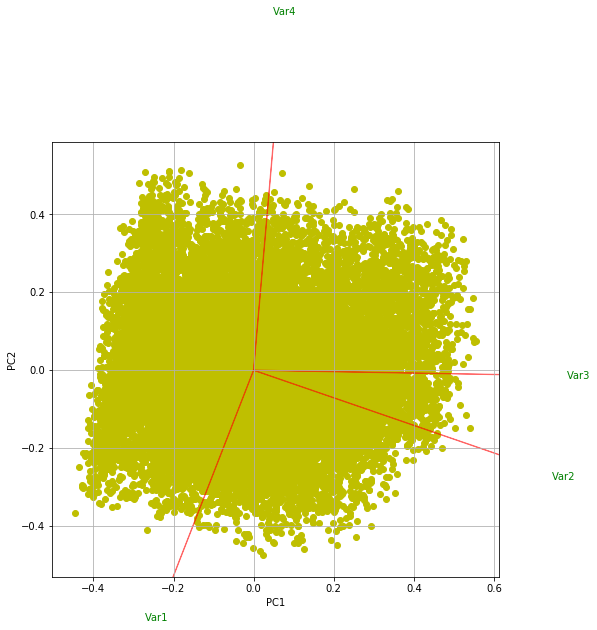

In [46]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = "y")
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
#plt.xlim(-1,1)
#plt.ylim(-1,1)
plt.gcf().set_size_inches(8,8)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_reduced[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

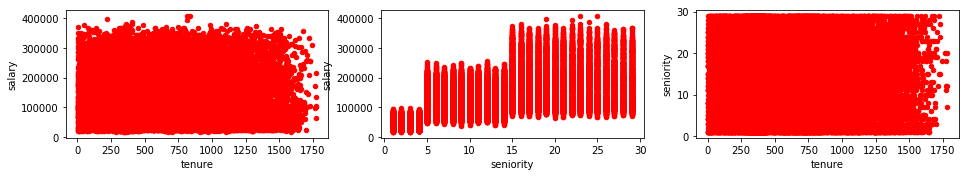

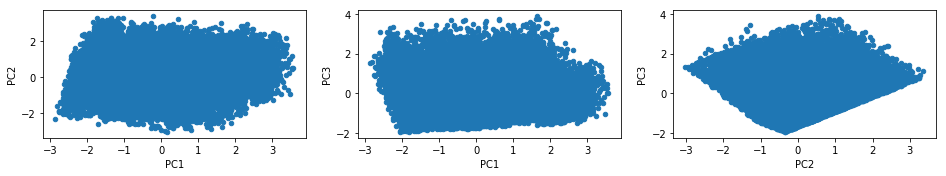

In [47]:
#plt.figure(figsize=(12, 12))
plt.gcf().set_size_inches(16,8)
X.plot(kind='scatter',x='tenure',y='salary',ax=plt.subplot(331),color='r')
X.plot(kind='scatter',x='seniority',y='salary',ax=plt.subplot(332),color='r')
X.plot(kind='scatter',x='tenure',y='seniority',ax=plt.subplot(333),color='r')
plt.show()
plt.gcf().set_size_inches(16,8)
X_reduceddf.plot(kind='scatter',x='PC1',y='PC2',ax=plt.subplot(331))
X_reduceddf.plot(kind='scatter',x='PC1',y='PC3',ax=plt.subplot(332))
X_reduceddf.plot(kind='scatter',x='PC2',y='PC3',ax=plt.subplot(333))
plt.show()

#### Comment: 
- Tenure, Salary, Seniority are the factor affect the churn model. 
- Company_id includes in the model to be the control variable which is helpful to separate the model for each company.

##### 5. Predictive Models

#### a. Logistic Regression

In [48]:
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.680360
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         still_employee   No. Observations:                24700
Model:                          Logit   Df Residuals:                    24696
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Sep 2018   Pseudo R-squ.:                 0.01217
Time:                        00:43:31   Log-Likelihood:                -16805.
converged:                       True   LL-Null:                       -17012.
                                        LLR p-value:                 1.835e-89
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
company_id     0.0032      0.004      0.755      0.450      -0.005       0.012
seniority     -0.0073      0.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
print("1. Logistic Regression")
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)
print('a. Accuracy: {:.2f}'.format(logreg.score(X_test, y_test)*100))
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("b. Accuracy for 10-fold cross validation: %.2f" % (results.mean()*100))
print("c. Confusion matrix:")
print(confusion_matrix(y_test, y_pred_log))
print("d. Classification Report")
print(classification_report(y_test, y_pred_log))

1. Logistic Regression
a. Accuracy: 62.75
b. Accuracy for 10-fold cross validation: 62.22
c. Confusion matrix:
[[3546  512]
 [2248 1104]]
d. Classification Report
             precision    recall  f1-score   support

          0       0.61      0.87      0.72      4058
          1       0.68      0.33      0.44      3352

avg / total       0.64      0.63      0.60      7410



#### 2. Decision Tree

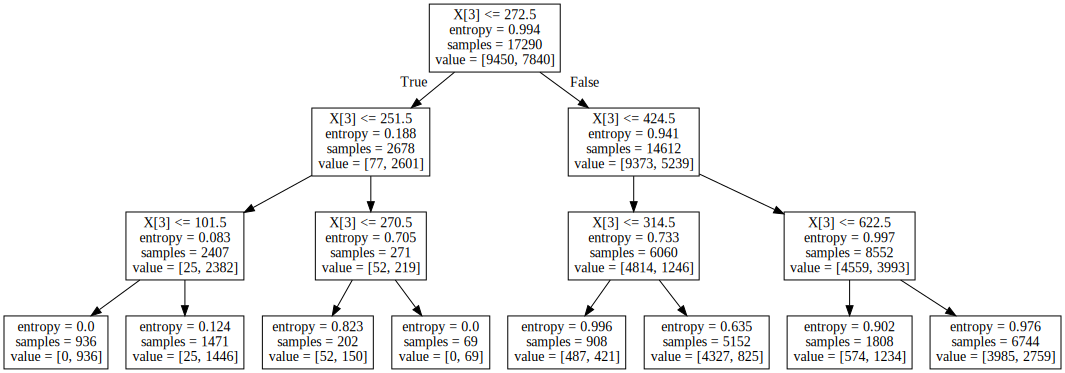

In [51]:
%matplotlib inline
entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=3)
entropy.fit(X_train, y_train)
dot_data = tree.export_graphviz(entropy, out_file=None) 
graph = graphviz.Source(dot_data)
graph

In [52]:
print("2. Decision Tree")
y_pred_en = entropy.predict(X_test)
y_prob_en= entropy.predict_proba(X_test)
print('a. Accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred_en)*100))
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=3)
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("b. Accuracy for 10-fold cross validation: %.3f" % (results.mean()*100))
print("c. Confusion matrix:")
print(confusion_matrix(y_test, y_pred_en))
print("d. Classification Report")
print(classification_report(y_test, y_pred_en))


2. Decision Tree
a. Accuracy: 73.914
b. Accuracy for 10-fold cross validation: 72.921
c. Confusion matrix:
[[3790  268]
 [1665 1687]]
d. Classification Report
             precision    recall  f1-score   support

          0       0.69      0.93      0.80      4058
          1       0.86      0.50      0.64      3352

avg / total       0.77      0.74      0.72      7410



#### 3. Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

In [54]:
print("5. Random Forest")
y_pred_RF = RF.predict(X_test)
y_prob_RF= RF.predict_proba(X_test)
print('a. Accuracy: {:.3f}'.format(accuracy_score(y_test,y_pred_RF)*100))
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0)
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring='accuracy')
print("b. Accuracy for 10-fold cross validation: %.3f" % (results.mean()*100))
print("c. Confusion matrix:")
print(confusion_matrix(y_test, y_pred_RF))
print("d. Classification Report")
print(classification_report(y_test, y_pred_RF))

5. Random Forest
a. Accuracy: 78.637
b. Accuracy for 10-fold cross validation: 78.271
c. Confusion matrix:
[[3429  629]
 [ 954 2398]]
d. Classification Report
             precision    recall  f1-score   support

          0       0.78      0.84      0.81      4058
          1       0.79      0.72      0.75      3352

avg / total       0.79      0.79      0.79      7410



#### 4. ROC Curve

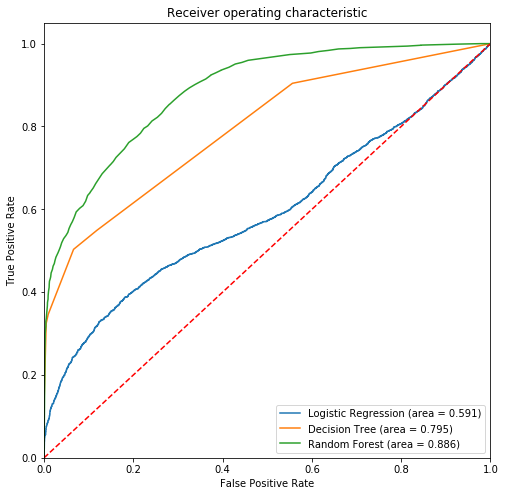

In [55]:
%matplotlib inline

plt.gcf().set_size_inches(8,8)

fpr_log, tpr_log, thresholds_log = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.3f)' % roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

y_prob_en= entropy.predict_proba(X_test)
fpr_en, tpr_en, thresholds_en = metrics.roc_curve(y_test, y_prob_en[:,1])
plt.plot(fpr_en, tpr_en, label='Decision Tree (area = %0.3f)' % roc_auc_score(y_test, y_prob_en[:,1]))

y_prob_RF= RF.predict_proba(X_test)
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(y_test, y_prob_RF[:,1])
plt.plot(fpr_RF, tpr_RF, label='Random Forest (area = %0.3f)' % roc_auc_score(y_test, y_prob_RF[:,1]))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

### H. Analysis

##### 1. Model building
- We are building a classification model where we try to predict a outcome from given information. In this case, Tenure, Salary and Seniority are important factors to predict chunk employee. These variables are selected by EDA and statistical techniques. 
- To build a classification model, we have many methods such as Logistic Regression, Decision Tree or Random Forest. But in general, all the techniques will give you the probability of particular outcome from given data. 
- To access which on is the best model to predict, we base on many criteria such as the nature of data, the model accuracy, confusion matrix, ROC curve.
##### 2. Model accuracy
- Accuracy is a measurement of correct predictions made by the model or the ratio of fraud transactions classified as fraudulent transaction and valid classified as non-fraud to the total transactions in the test data.
- The most accuracy model is Random Forest with 78.64% accurate. and the lowest is logistic regression with around 62.75%. Those accuracy is not that good prediction model due to low number of independent variables so we should add more variables to improve.
- We double check by 10-fold cross validation to make sure the accuracy is consistent and the train- test set division is correct. 
##### 3. Best Model
- The ROC curve recommends that Random Forest is the best model.
##### 4. Model improvement
- To improve the model, we can add more variables such as: Daily headcount for each department at the time accessing, Company size, Level of satisfaction (Collected by survey), Workload (Number of ongoing projects or tasks).